## Final Project Submission

Please fill out:
* Student name: Jane Njuguna
* Student pace:Full time
* Scheduled project review date/time:30/09/2022 
* Instructor name: Lucille Kaleha

## Business understanding
#### Business overview
Cherie real estate agency is a housing stakeholder that gives advice to homeowners so that they can buy and/or sell home. 
#### Objectives
We want to know how renovation of the 
We help homeowners to be able to predict the current and future prices of their houses depending on the renovations done on their houses so that they can know the best time to buy or sell their houses. 

We will build a model that will help us to predict the prices. This will help them to plan on so that they can be able to plan on when to buy 
We want to give to be able to give good advise to the homeowners about  the current and future prices of the houses

We want to do analysis and create a model so that we can know how the location and the condition of the house  might increase the estimated value of their homes and by what amount. This will help us 

## Data description 

In [103]:
# importing libraries
#For visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# For numerical operations
import numpy as np
#For data loading, data analysis and data cleaning 
import pandas as pd

import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

### Data loading
The data used is from kc_house_data.csv

In [104]:
# loading the data
houses_df = pd.read_csv("data/kc_house_data.csv")

### Data understanding
    1. Checking the shape of the dataframe
    2. Generate an overview of the dataframe
    3. Checking the data for null values
    4. Check if the rows are duplicated in the dataframe

In [105]:
# to check the shape of the dataframe
houses_df.shape

(21597, 21)

In [106]:
# to check  information about the DataFrame
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [125]:
# checking the type of data types in the dataset
houses_df.dtypes.value_counts()

int64      9
object     6
float64    6
dtype: int64

In [107]:
#to check the columns in the dataset
houses_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [108]:
# the overview of the dataframe
houses_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [109]:
# the overview of the dataframe
houses_df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [110]:
# descriptive statistics of the dataset
houses_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [111]:
#checking the unique values per column
houses_df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [120]:
# To check the the null values in the dataset
missing_data_check = houses_df.isnull().sum().sort_values(ascending = False)
missing_data_check

yr_renovated     3842
waterfront       2376
view               63
id                  0
sqft_above          0
sqft_living15       0
long                0
lat                 0
zipcode             0
yr_built            0
sqft_basement       0
condition           0
grade               0
date                0
floors              0
sqft_lot            0
sqft_living         0
bathrooms           0
bedrooms            0
price               0
sqft_lot15          0
dtype: int64

In [122]:
#percentage of missing values
total_percent = (houses_df.isnull().sum()/houses_df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([missing_data_check,total_percent],
                         axis = 1,keys =["total missing values","missing values percentage"])
missing_data

,total missing values,missing values percentage
yr_renovated,3842,0.177895
waterfront,2376,0.110015
view,63,0.002917
id,0,0.000000
sqft_above,0,0.000000
sqft_living15,0,0.000000
long,0,0.000000
lat,0,0.000000
zipcode,0,0.000000
yr_built,0,0.000000


### Dealing with null values conclusion
Since the percentage of the null per column in our dataset is low i opted to drop all the null values in the dataset

In [126]:
# checking for duplicates
houses_df.duplicated().sum()

0

## *Data description report*
1. The data used is in the form of a csv file.
2. The dataframe has 21597 rows and 21 columns.
3. The dataframe has 6 float64,9 int64 and 6 object data types.
4. "waterfront", "view" and "yr_renovated" contains null values. The percentage of missing value in this colums are 0.110015,0.002917 and 0.177895 respectively.
5. The dataframe has no duplicated values

### Data Cleaning
    1. Dealing with the null values
    2. Dropping columns that will not be used

In [127]:
# Dropping null values in the dataset
houses_df.dropna(inplace = True)

In [128]:
# Dropping columns that will not be used in the study
houses_df.drop(["yr_renovated","sqft_above","sqft_basement",
               "zipcode","sqft_lot15","sqft_living15","date"],axis=1,inplace = True)

### Data exploration
1. Generate a pairwise scatterplot to explore the data
2. Compute the correlation coefficient for all column pairs in houses_df dataframe

In [ ]:
# plt.figure(figsize=(10, 10))
# cmap = sns.diverging_palette(220,20,n=200)
# heatmap = sns.heatmap(
#     houses_df.corr().sort_values(by='price',ascending=False),vmin=-1, vmax=1,center = 0,
#     annot=True,cmap=cmap,linewidths=2, linecolor='black')
# heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

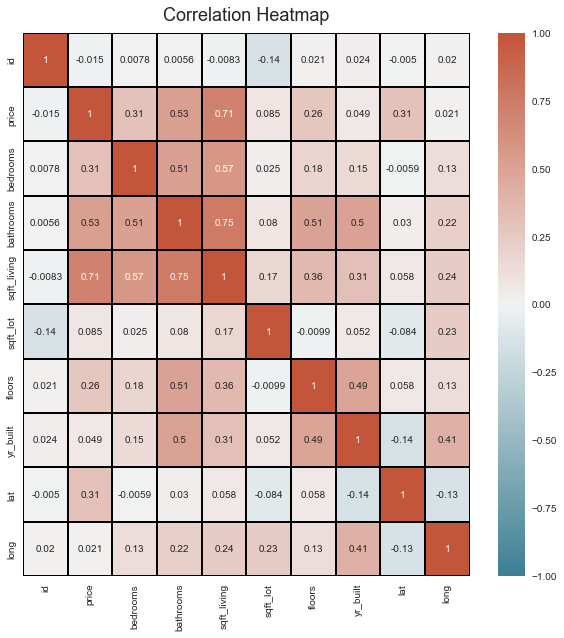

In [140]:
# plotting a heatmap
# It shows the correlation between different column pairs
plt.figure(figsize=(10, 10))
cmap = sns.diverging_palette(220,20,n=200)
heatmap = sns.heatmap(
    houses_df.corr(),vmin=-1, vmax=1,center = 0,
    annot=True,cmap=cmap,linewidths=2, linecolor='black')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [144]:
# Compute the correlation coefficient for all column pairs
corr_columns = houses_df.corr().sort_values(by='price',ascending=False)
corr_columns

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,lat,long
price,-0.015183,1.000000,0.305489,0.526155,0.706189,0.084504,0.259505,0.049345,0.306607,0.021215
sqft_living,-0.008255,0.706189,0.573575,0.753846,1.000000,0.165336,0.359407,0.314220,0.058394,0.239521
bathrooms,0.005569,0.526155,0.512243,1.000000,0.753846,0.080362,0.505187,0.504841,0.029930,0.222755
lat,-0.004967,0.306607,-0.005917,0.029930,0.058394,-0.084304,0.058190,-0.144089,1.000000,-0.133840
bedrooms,0.007806,0.305489,1.000000,0.512243,0.573575,0.025460,0.180485,0.153229,-0.005917,0.129370
floors,0.020538,0.259505,0.180485,0.505187,0.359407,-0.009924,1.000000,0.487052,0.058190,0.129769
sqft_lot,-0.135739,0.084504,0.025460,0.080362,0.165336,1.000000,-0.009924,0.051578,-0.084304,0.231638
yr_built,0.023832,0.049345,0.153229,0.504841,0.314220,0.051578,0.487052,1.000000,-0.144089,0.408623
long,0.019701,0.021215,0.129370,0.222755,0.239521,0.231638,0.129769,0.408623,-0.133840,1.000000
id,1.000000,-0.015183,0.007806,0.005569,-0.008255,-0.135739,0.020538,0.023832,-0.004967,0.019701


### Data Exploration Report
1. 

## Analysing the 'price' column 
Since sales column is our dependent variable i will analyse to see it relates with the independent variables 

In [ ]:
# Heatmap showing the correlation of columns with the price column  
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(
    houses_df.corr()[['price']].sort_values(by='price',ascending=False),
    vmin=-1, vmax=1, annot=True, 
    cmap='BrBG',linewidths=2, linecolor='black')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

<AxesSubplot:xlabel='price', ylabel='Density'>

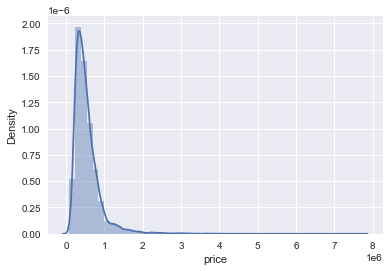

In [101]:
sns.distplot(houses_df["price"])